Load and Preprocess Data

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the saved features and labels
X = np.load("/content/X_features.npy", allow_pickle=True)
y = np.load("/content/y_labels.npy")

# Normalize features (optional but recommended)
X = X.astype('float32')
X = (X - np.mean(X)) / np.std(X)

# Convert labels to one-hot
y = to_categorical(y, num_classes=2)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("✅ Data loaded")
print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


✅ Data loaded
X shape: (100, 150, 15), y shape: (100, 2)
X_train: (80, 150, 15), X_test: (20, 150, 15)


CRNN Model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense, TimeDistributed, BatchNormalization

n_timesteps = X.shape[1]     # e.g., 150
n_features = X.shape[2]      # e.g., 15 (13 MFCC + pitch + energy)

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(2, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train

In [4]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 392ms/step - accuracy: 0.8328 - loss: 0.3987 - val_accuracy: 0.6000 - val_loss: 0.5925
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9031 - loss: 0.3458 - val_accuracy: 0.6000 - val_loss: 0.5843
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8953 - loss: 0.2791 - val_accuracy: 0.6000 - val_loss: 0.5856
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.8992 - loss: 0.2801 - val_accuracy: 0.6500 - val_loss: 0.5975
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9133 - loss: 0.2519 - val_accuracy: 0.6500 - val_loss: 0.6029
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8938 - loss: 0.2345 - val_accuracy: 0.7500 - val_loss: 0.5914
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9070 - loss: 0.1955 - val_accuracy: 0.7500 - val_loss: 0.5764
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9273 - loss: 0.1903 - val_accuracy: 0.7500 - val_loss: 

Evaluate model

In [5]:
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7500 - loss: 0.3896
✅ Test Accuracy: 75.00%


Save the Model

In [6]:
model.save("crnn_audio_classifier.h5")
print("💾 Model saved as crnn_audio_classifier.h5")


💾 Model saved as crnn_audio_classifier.h5


Visualize Training

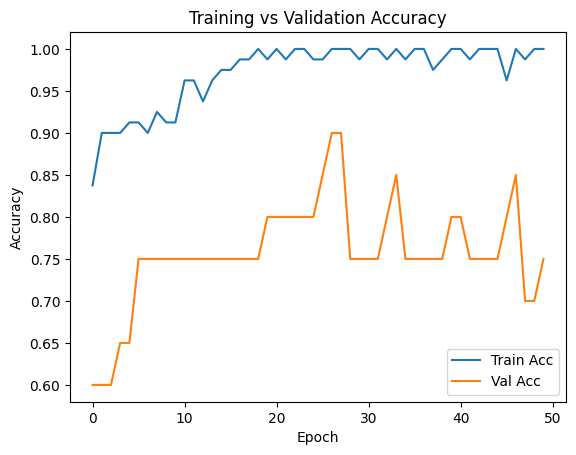

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
